In [1]:
import os
# https://medium.com/towards-data-science/an-introduction-to-the-mxnet-api-part-4-df22560b83fe


In [2]:
import mxnet as mx

os.chdir('/Users/mcloney/PyCharmProjects/deep-learning-notes/tensorflow')



In [3]:
sym, arg_params, aux_params = mx.model.load_checkpoint('caffenet', 0)



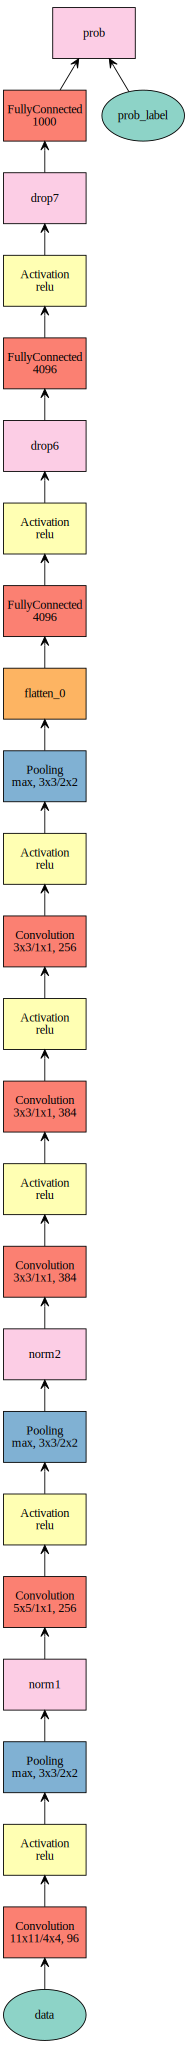

In [4]:
mx.viz.plot_network(sym)

In [21]:
mod = mx.mod.Module(symbol=sym, label_names=["prob_label"])


In [5]:
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], label_shapes=None) # ["prob_label", (1,3)]


/Users/mcloney/anaconda3/lib/python3.6/site-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['prob_label'])
  warnings.warn(msg)


In [24]:
mod.set_params(arg_params, aux_params)



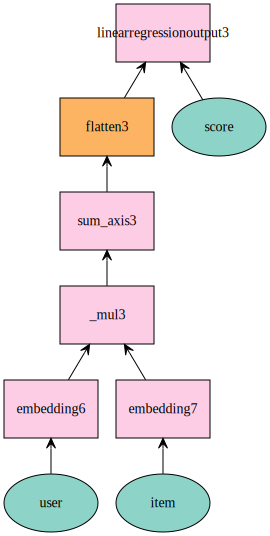

In [10]:
import mxnet as mx
user = mx.symbol.Variable('user')
item = mx.symbol.Variable('item')
score = mx.symbol.Variable('score')

# Set dummy dimensions
k = 64
max_user = 100
max_item = 50

# user feature lookup
user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)

# item feature lookup
item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)

# predict by the inner product, which is elementwise product and then sum
net = user * item
net = mx.symbol.sum_axis(data = net, axis = 1)
net = mx.symbol.Flatten(data = net)

# loss layer
net = mx.symbol.LinearRegressionOutput(data = net, label = score)

# Visualize your network
mx.viz.plot_network(net)



In [11]:
import find_mxnet
import mxnet as mx
import importlib

name = "inception-v3"
net = importlib.import_module("symbol_" + name).get_symbol(2)
a = mx.viz.plot_network(net, shape={"data":(1, 1, 299, 299)}, node_attrs={"shape":'rect',"fixedsize":'false'})
a.render(name)

ModuleNotFoundError: No module named 'find_mxnet'

In [13]:
import json
jj = json.loads(net.tojson())

In [17]:
qq = json.loads('')

SyntaxError: EOL while scanning string literal (<ipython-input-17-48f0f403520a>, line 1)

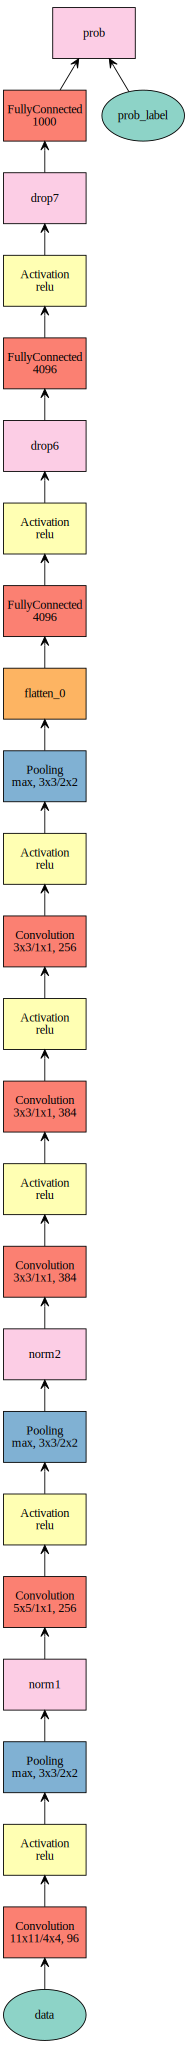

In [27]:
mx.viz.plot_network(sym)